In [85]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
# For this dataset, the main file is usually 'healthcare-dataset-stroke-data.csv'
file_path = "healthcare-dataset-stroke-data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/stroke-prediction-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\gabri\AppData\Local\Temp\ipykernel_3844\2514247678.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


Shape of the dataset: (5110, 12)
Columns in the dataset: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Data types of each column: id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
Distribuição da classe alvo stroke:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


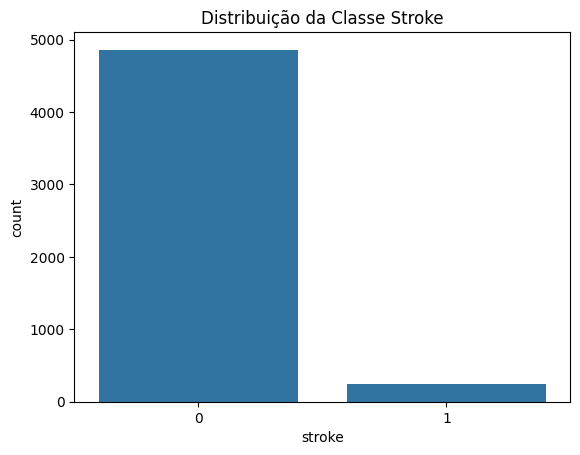

In [86]:
#análise exploratória
print("Shape of the dataset:", df.shape)

print("Columns in the dataset:", df.columns.tolist())

#verificar tipos de dados
print("Data types of each column:", df.dtypes)

#distribuicao da classe stroke
print("Distribuição da classe alvo stroke:")
print(df['stroke'].value_counts(normalize=True))

#visualizar relações entre variáveis com gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='stroke', data=df)
plt.title('Distribuição da Classe Stroke')
plt.show()





In [87]:
work_type = df['work_type'].value_counts()
work_type
bmi = df['bmi']
bmi

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [88]:
# Remover coluna 'id' (não é útil para modelagem)
df = df.drop('id', axis=1)

In [89]:
#investigar valores ausentes
print("Valores ausentes por coluna:", df.isnull().sum())



Valores ausentes por coluna: gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Coluna: age
Total de outliers: 0
Limite inferior: -29.00, Limite superior: 115.00



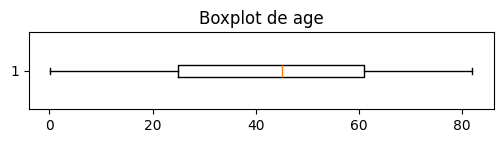

Coluna: avg_glucose_level
Total de outliers: 627
   avg_glucose_level
0             228.69
1             202.21
3             171.23
4             174.12
5             186.21
Limite inferior: 21.98, Limite superior: 169.36



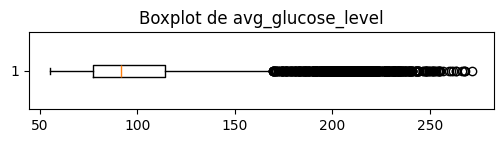

Coluna: bmi
Total de outliers: 110
      bmi
21   48.9
113  56.6
254  50.1
258  54.6
270  60.9
Limite inferior: 9.10, Limite superior: 47.50



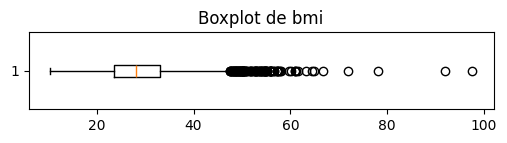


Verificando valores inconsistentes:
Valores negativos em 'age': 0
Valores negativos em 'bmi': 0
Valores negativos em 'avg_glucose_level': 0


In [90]:
# Detecção de outliers e valores inconsistentes
import numpy as np
import matplotlib.pyplot as plt


# Seleciona apenas colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Função para detectar outliers pelo método do IQR
def detectar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Identificar colunas binárias (apenas 0 e 1)
binary_cols = [col for col in df_numerico.columns if set(df_numerico[col].dropna().unique()).issubset({0,1})]
# Selecionar apenas colunas numéricas não binárias
colunas_numericas_sem_binarias = [col for col in df_numerico.columns if col not in binary_cols]

for col in colunas_numericas_sem_binarias:
    outliers, li, ls = detectar_outliers_iqr(df_numerico, col)
    print(f"Coluna: {col}")
    print(f"Total de outliers: {outliers.shape[0]}")
    if outliers.shape[0] > 0:
        print(outliers[[col]].head())
    print(f"Limite inferior: {li:.2f}, Limite superior: {ls:.2f}\n")
    # Boxplot para visualização
    plt.figure(figsize=(6,1))
    plt.boxplot(df_numerico[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.show()

# Verificar valores inconsistentes (exemplo: negativos em variáveis que não podem ser negativas)
print("\nVerificando valores inconsistentes:")
if 'age' in df_numerico.columns:
    print(f"Valores negativos em 'age': {df_numerico[df_numerico['age'] < 0].shape[0]}")
if 'bmi' in df_numerico.columns:
    print(f"Valores negativos em 'bmi': {df_numerico[df_numerico['bmi'] < 0].shape[0]}")
if 'avg_glucose_level' in df_numerico.columns:
    print(f"Valores negativos em 'avg_glucose_level': {df_numerico[df_numerico['avg_glucose_level'] < 0].shape[0]}")

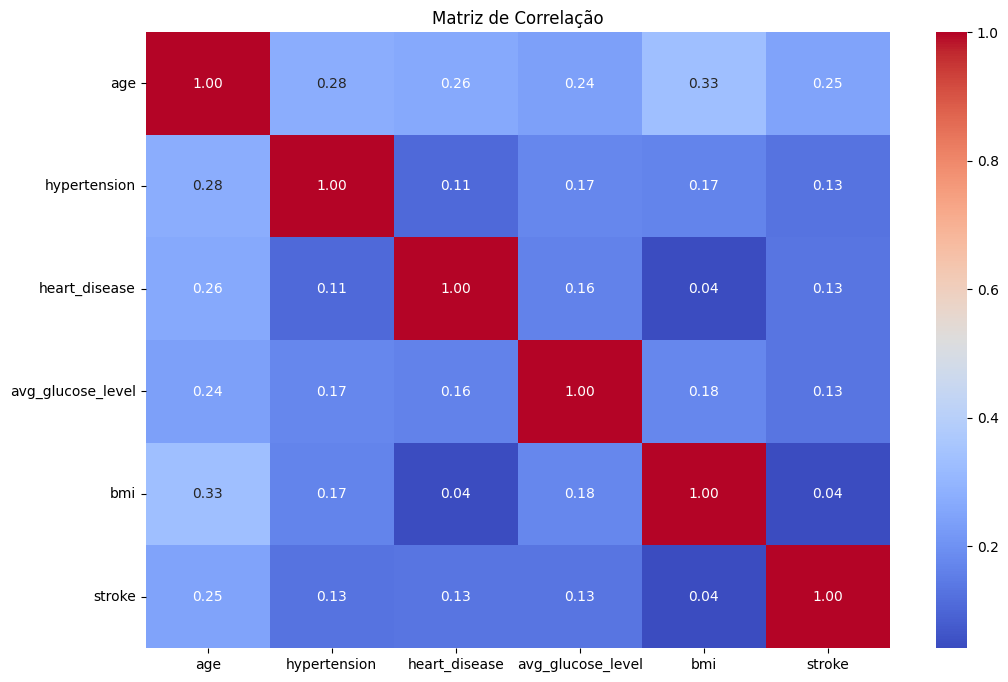

In [91]:


plt.figure(figsize=(12, 8))
sns.heatmap(df_numerico.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

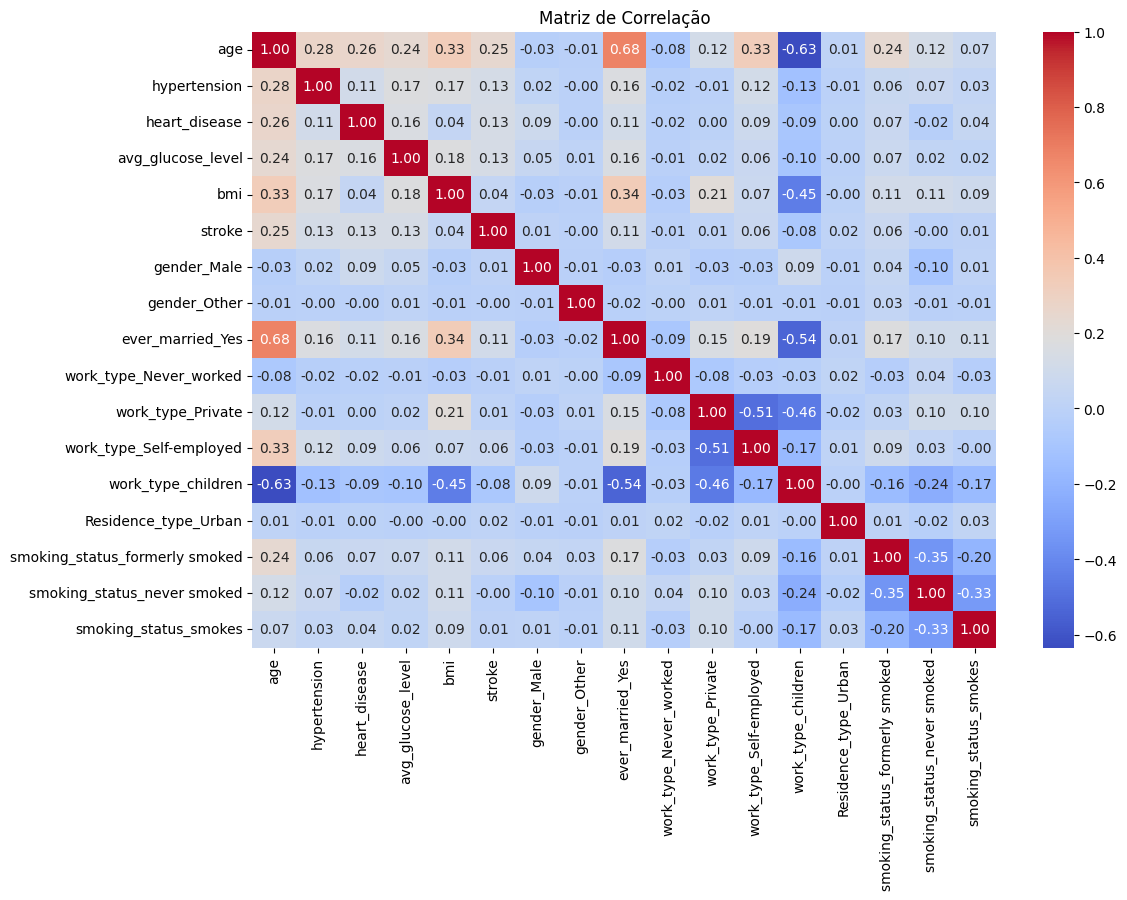

In [92]:


# Identificar variáveis categóricas
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Aplicar One-Hot Encoding nas variáveis categóricas
import pandas as pd

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()

#matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Ever married e work_type parecem estar altamente relacionados a idade.
gender_other e o resident_type parecem irrelevantes.
Por isso, retiramos:

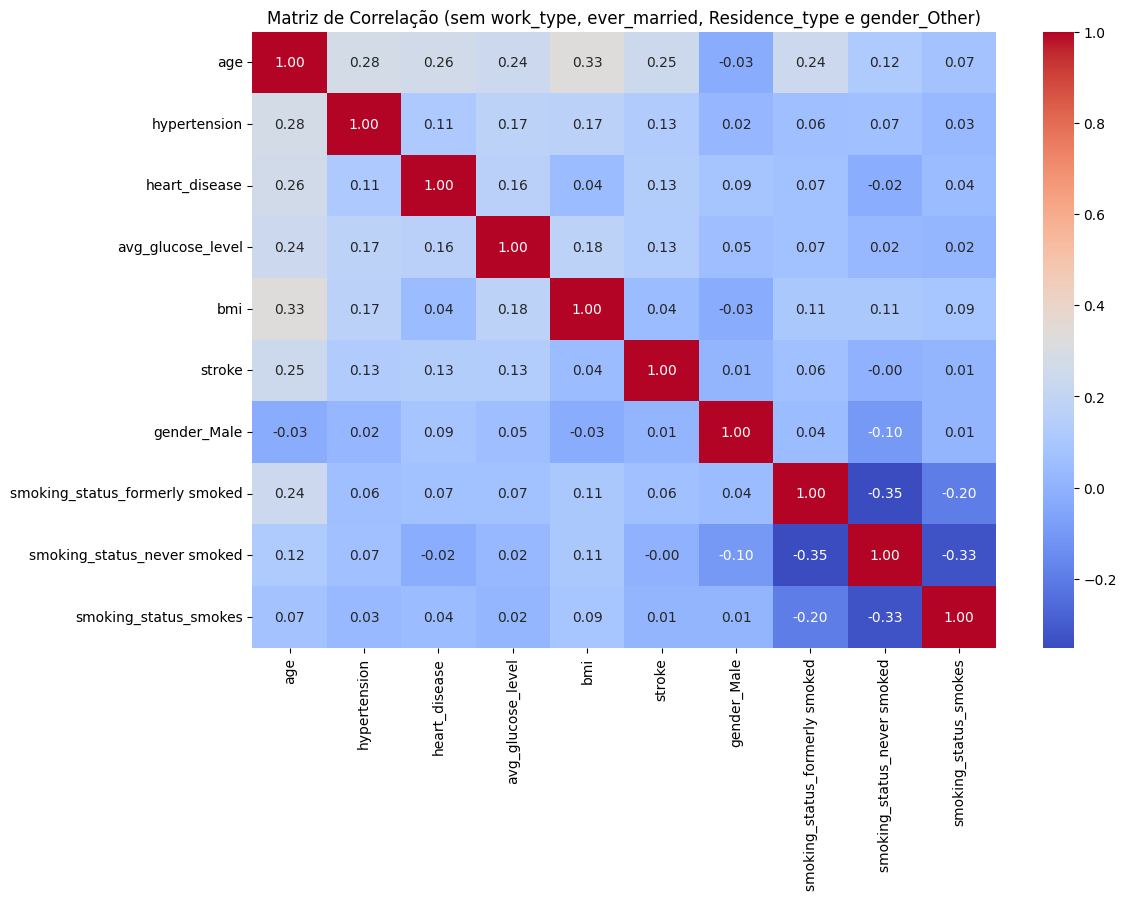

In [97]:
# Matriz de correlação sem work_type, ever_married, Residence_type e gender_Other, mantendo apenas gender_Male
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar colunas a remover
worktype_cols = [col for col in df_encoded.columns if 'work_type' in col]
evermarried_cols = [col for col in df_encoded.columns if 'ever_married' in col]
residence_cols = [col for col in df_encoded.columns if 'Residence_type' in col]
gender_other_col = [col for col in df_encoded.columns if col == 'gender_Other']
gender_female_col = [col for col in df_encoded.columns if col == 'gender_Female']

cols_to_drop = worktype_cols + evermarried_cols + residence_cols + gender_other_col + gender_female_col

# Criar novo DataFrame sem essas colunas
df_limpo = df_encoded.drop(columns=cols_to_drop)

plt.figure(figsize=(12, 8))
sns.heatmap(df_limpo.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação (sem work_type, ever_married, Residence_type e gender_Other)')
plt.show()

In [94]:
# Criação de variáveis derivadas
import pandas as pd

df_feat = df_limpo.copy()

# 1. Idade categorizada (faixas etárias)
df_feat['age_group'] = pd.cut(df_feat['age'], bins=[0, 30, 50, 120], labels=['jovem', 'adulto', 'idoso'])
df_feat = pd.get_dummies(df_feat, columns=['age_group'], drop_first=True)

# 2. Interação entre fatores de risco: hipertensão e doença cardíaca
df_feat['hipertensao_cardiaco'] = df_feat['hypertension'] * df_feat['heart_disease']

# 3. Interação entre idade e IMC
df_feat['age_bmi'] = df_feat['age'] * df_feat['bmi']

# 4. IMC categorizado (baixo, normal, sobrepeso, obeso)
df_feat['bmi_group'] = pd.cut(df_feat['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['baixo', 'normal', 'sobrepeso', 'obeso'])
df_feat = pd.get_dummies(df_feat, columns=['bmi_group'], drop_first=True)

# Visualizar as novas variáveis
df_feat

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_adulto,age_group_idoso,hipertensao_cardiaco,age_bmi,bmi_group_normal,bmi_group_sobrepeso,bmi_group_obeso
0,67.0,0,1,228.69,36.6,1,True,True,False,False,False,True,0,2452.2,False,False,True
1,61.0,0,0,202.21,NaN,1,False,False,True,False,False,True,0,NaN,False,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,False,True,0,2600.0,False,False,True
3,49.0,0,0,171.23,34.4,1,False,False,False,True,True,False,0,1685.6,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,0,1896.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,False,False,True,False,False,True,0,NaN,False,False,False
5106,81.0,0,0,125.20,40.0,0,False,False,True,False,False,True,0,3240.0,False,False,True
5107,35.0,0,0,82.99,30.6,0,False,False,True,False,True,False,0,1071.0,False,False,True
5108,51.0,0,0,166.29,25.6,0,True,True,False,False,False,True,0,1305.6,False,True,False
